### NetID: !! ADD NET_ID !!

# Minimal neural network implementation

This is a "bare bones" implementation of a 2-layer neural network for classification, using rectified linear units as activation functions. The code is from Andrej Karpathy; please see [this page](http://cs231n.github.io/neural-networks-case-study/) for an annotated description of the code.

Your task in this part of the assigment is to extend this to a 3-layer network, and to experiment with some different settings of the parameters.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.facecolor'] = 'lightgray'


(-1.5, 1.5)

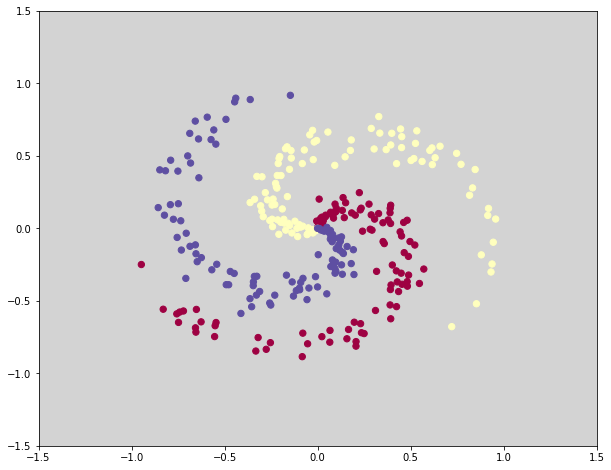

In [5]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.3 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])


In [34]:
def train_linear_classifier(lambda_param=1e-3):

    # initialize parameters randomly
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))

    # some hyperparameters
    step_size = 1e-0

    # gradient descent loop
    num_examples = X.shape[0]
    for i in range(200):
  
      # evaluate class scores, [N x K]
      scores = np.dot(X, W) + b 
  
      # compute the class probabilities
      exp_scores = np.exp(scores)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
      # compute the loss: average cross-entropy loss and regularization
      correct_logprobs = -np.log(probs[range(num_examples),y])
      data_loss = np.sum(correct_logprobs)/num_examples
      reg_loss = 0.5*lambda_param*np.sum(W*W)
      loss = data_loss + reg_loss
      if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
      # compute the gradient on scores
      dscores = np.array(probs)
      dscores[range(num_examples),y] -= 1
      dscores /= num_examples
  
      # backpropate the gradient to the parameters (W,b)
      dW = np.dot(X.T, dscores)
      db = np.sum(dscores, axis=0, keepdims=True)
  
      dW += lambda_param*W # regularization gradient
  
      # perform a parameter update
      W += -step_size * dW
      b += -step_size * db
    
    return W, b

W, b = train_linear_classifier(lambda_param=1e-3)

iteration 0: loss 1.097085
iteration 10: loss 0.947977
iteration 20: loss 0.895795
iteration 30: loss 0.874258
iteration 40: loss 0.864238
iteration 50: loss 0.859185
iteration 60: loss 0.856489
iteration 70: loss 0.854992
iteration 80: loss 0.854135
iteration 90: loss 0.853633
iteration 100: loss 0.853334
iteration 110: loss 0.853154
iteration 120: loss 0.853044
iteration 130: loss 0.852976
iteration 140: loss 0.852934
iteration 150: loss 0.852907
iteration 160: loss 0.852891
iteration 170: loss 0.852881
iteration 180: loss 0.852874
iteration 190: loss 0.852870


In [35]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.47


(-1.388797520476872, 1.4162024795231098)

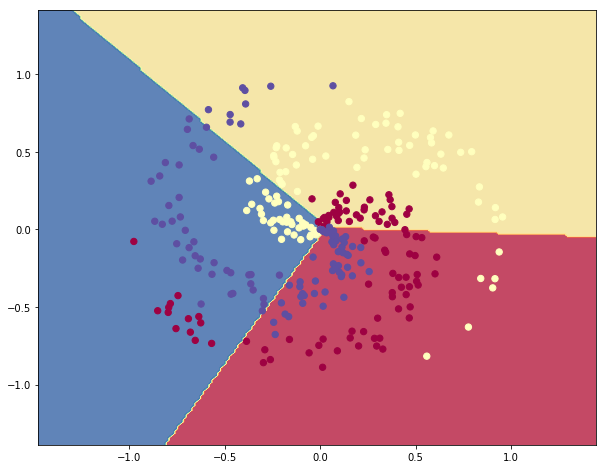

In [36]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


In [37]:
def train_2_layer_network(H1=100, lambda_param=1e-03):
    # initialize parameters randomly
    # H1 = 100 # size of hidden layer
    W1 = 0.01 * np.random.randn(D,H1)
    b1 = np.zeros((1,H1))
    W2 = 0.01 * np.random.randn(H1,K)
    b2 = np.zeros((1,K))

    # some hyperparameters
    step_size = 1e-1

    # gradient descent loop
    num_examples = X.shape[0]
    for i in range(20000):
  
      # evaluate class scores, [N x K]
      hidden_layer = np.maximum(0, np.dot(X, W1) + b1) # note, ReLU activation
      scores = np.dot(hidden_layer, W2) + b2
  
      # compute the class probabilities
      exp_scores = np.exp(scores)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
      # compute the loss: average cross-entropy loss and regularization
      correct_logprobs = -np.log(probs[range(num_examples),y])
      data_loss = np.sum(correct_logprobs)/num_examples
      reg_loss = 0.5*lambda_param*np.sum(W1*W1) + 0.5*lambda_param*np.sum(W2*W2)
      loss = data_loss + reg_loss
      if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
      # compute the gradient on scores
      dscores = np.array(probs)
      dscores[range(num_examples),y] -= 1
      dscores /= num_examples
  
      # backpropate the gradient to the parameters
      # first backprop into parameters W2 and b2
      dW2 = np.dot(hidden_layer.T, dscores)
      db2 = np.sum(dscores, axis=0, keepdims=True)
      # next backprop into hidden layer
      dhidden = np.dot(dscores, W2.T)
      # backprop the ReLU non-linearity
      dhidden[hidden_layer <= 0] = 0
      # finally into W,b
      dW1 = np.dot(X.T, dhidden)
      db1 = np.sum(dhidden, axis=0, keepdims=True)
  
      # add regularization gradient contribution
      dW2 += lambda_param * W2
      dW1 += lambda_param * W1
  
      # perform a parameter update
      W1 += -step_size * dW1
      b1 += -step_size * db1
      W2 += -step_size * dW2
      b2 += -step_size * db2

    return W1, b1, W2, b2


W1, b1, W2, b2 = train_2_layer_network(100, lambda_param=1e-4)

iteration 0: loss 1.098605
iteration 1000: loss 0.794985
iteration 2000: loss 0.725148
iteration 3000: loss 0.571962
iteration 4000: loss 0.417493
iteration 5000: loss 0.316539
iteration 6000: loss 0.257950
iteration 7000: loss 0.217875
iteration 8000: loss 0.190233
iteration 9000: loss 0.173444
iteration 10000: loss 0.161620
iteration 11000: loss 0.152039
iteration 12000: loss 0.144711
iteration 13000: loss 0.137580
iteration 14000: loss 0.131929
iteration 15000: loss 0.127468
iteration 16000: loss 0.123701
iteration 17000: loss 0.120641
iteration 18000: loss 0.117985
iteration 19000: loss 0.115989


In [38]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.98


(-1.888797520476872, 1.426202479523106)

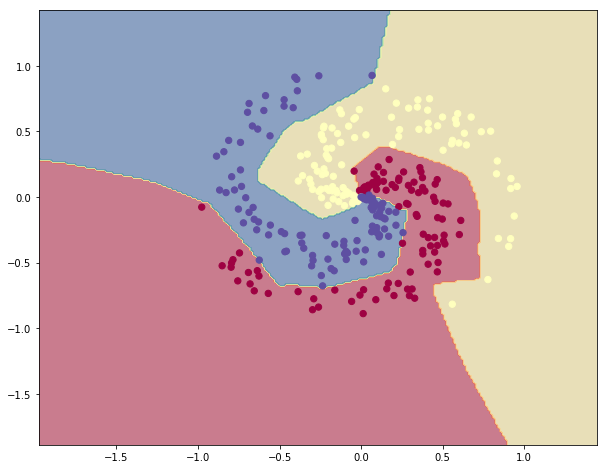

In [39]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


## (b) Extend the code from two layers to three layers (15 points)

Run the code provided in the notebook minimal neural network.ipynb and inspect it to be sure you understand how it works. (We did this in class!) Then, after working out the derivatives in part (a) above, extend the code by writing a function that implements a 3-layer version. Your function declaration should look like this:
```python
def train_3_layer_network(H1=100, H2=100, lambda_param=1e-03)
```    
where H1 is the number of hidden units in the first layer, and H2 is the number of hidden units in the second layer. Then train a 3-layer network and display the classification results in your notebook, as is done for the 2-layer network in the starter code.

In [ ]:
def train_3_layer_network(H1=100, H2=100, lambda_param=1e-03):

## Extra credit (7 points)

As extra credit, make the code more modular and write a function to implement a general multilayer network:

In [ ]:
def train_multi_layer_network(H=[100, 100], lambda_param=1e-03):

## (c) Experiment with different parameter settings (10 points)

Now experiment with different network configurations and training parameters. For example, you can train models with different numbers of hidden nodes H1 and H2, and different settings of the regularization parameter lambda param. Train at least three and no more than five networks. For each network, display the decision boundaries on the training data, and include a Markdown cell that describes its behavior relative to the other networks you train. Specifically, comment on how the different settings of the parameters change the bias and variance of the fitted model.